In [142]:
# Jupyter Notebook - Calculate Optimal Fluorescence Lifetime for Fluorescence Polarization system
# Gage Leighton - 2021-12-18

# Use this website to calculate rotational correlation times for unbound and bound states
# http://nickanthis.com/tools/tau
Unbound_tau = 1.39e-9
Bound_tau = 3.773e-9
temp = 293.15 # 20C

viscosity = 2.414e-5 * 10**(247.8/(temp-140))

In [143]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy import constants
import numpy as np

In [157]:
# Convert system mass (Da) into Rotational Correlation Time
def da2rct(x):
    return 4*constants.pi/3 * viscosity/(constants.k * temp) * 1.212e-30 * x

# Convert fluorophore tau and rotational correlation time to polarization
# https://www.thermofisher.com/us/en/home/references/molecular-probes-the-handbook/technical-notes-and-product-highlights/fluorescence-polarization-fp.html
def polarization(tau, phi):
    return (1.666666*(1+tau/phi)+1/3)**(-1)

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(1,1.1), **kw)

In [158]:
# https://biologicalproceduresonline.biomedcentral.com/track/pdf/10.1007/s12575-009-9008-x.pdf
tau = np.arange(0.11e-9,5e-9, 0.1e-9, dtype=float)

# rct_un = da2rct(Unbound_mass)
# rct_bound = da2rct(Bound_mass)
# print(rct_un,rct_bound)
# rct_un = 1.39e-9
# rct_bound = 3.773e-9

y = np.array(polarization(tau,rct_bound)) - np.array(polarization(tau,rct_un))

# print(np.c_[tau*1e9,y])

2.5130831418735187e-09 9.298407624932019e-09


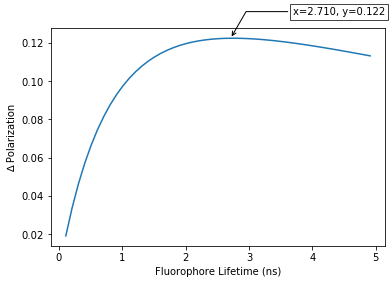

In [161]:
f, ax = plt.subplots(1)
x = tau*1e9
ax.plot(x,y)
# plt.ticklabel_format(axis='x', style='sci', scilimits=(-9,-9))
plt.xlabel("Fluorophore Lifetime (ns)")
plt.ylabel("∆ Polarization")
annot_max(x,y,ax)
# f.savefig("Test.png")